The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.



In [51]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.model_selection import train_test_split

EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [52]:
data= pd.read_csv("C:/Users/A0779566/AIML-Python/cars-dataset.csv",na_values='?')  

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [54]:
data.columns[data.isna().any() == True]

Index(['hp'], dtype='object')

In [55]:
df_drop_na = data.dropna() # dropping the columns rows with missing values
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

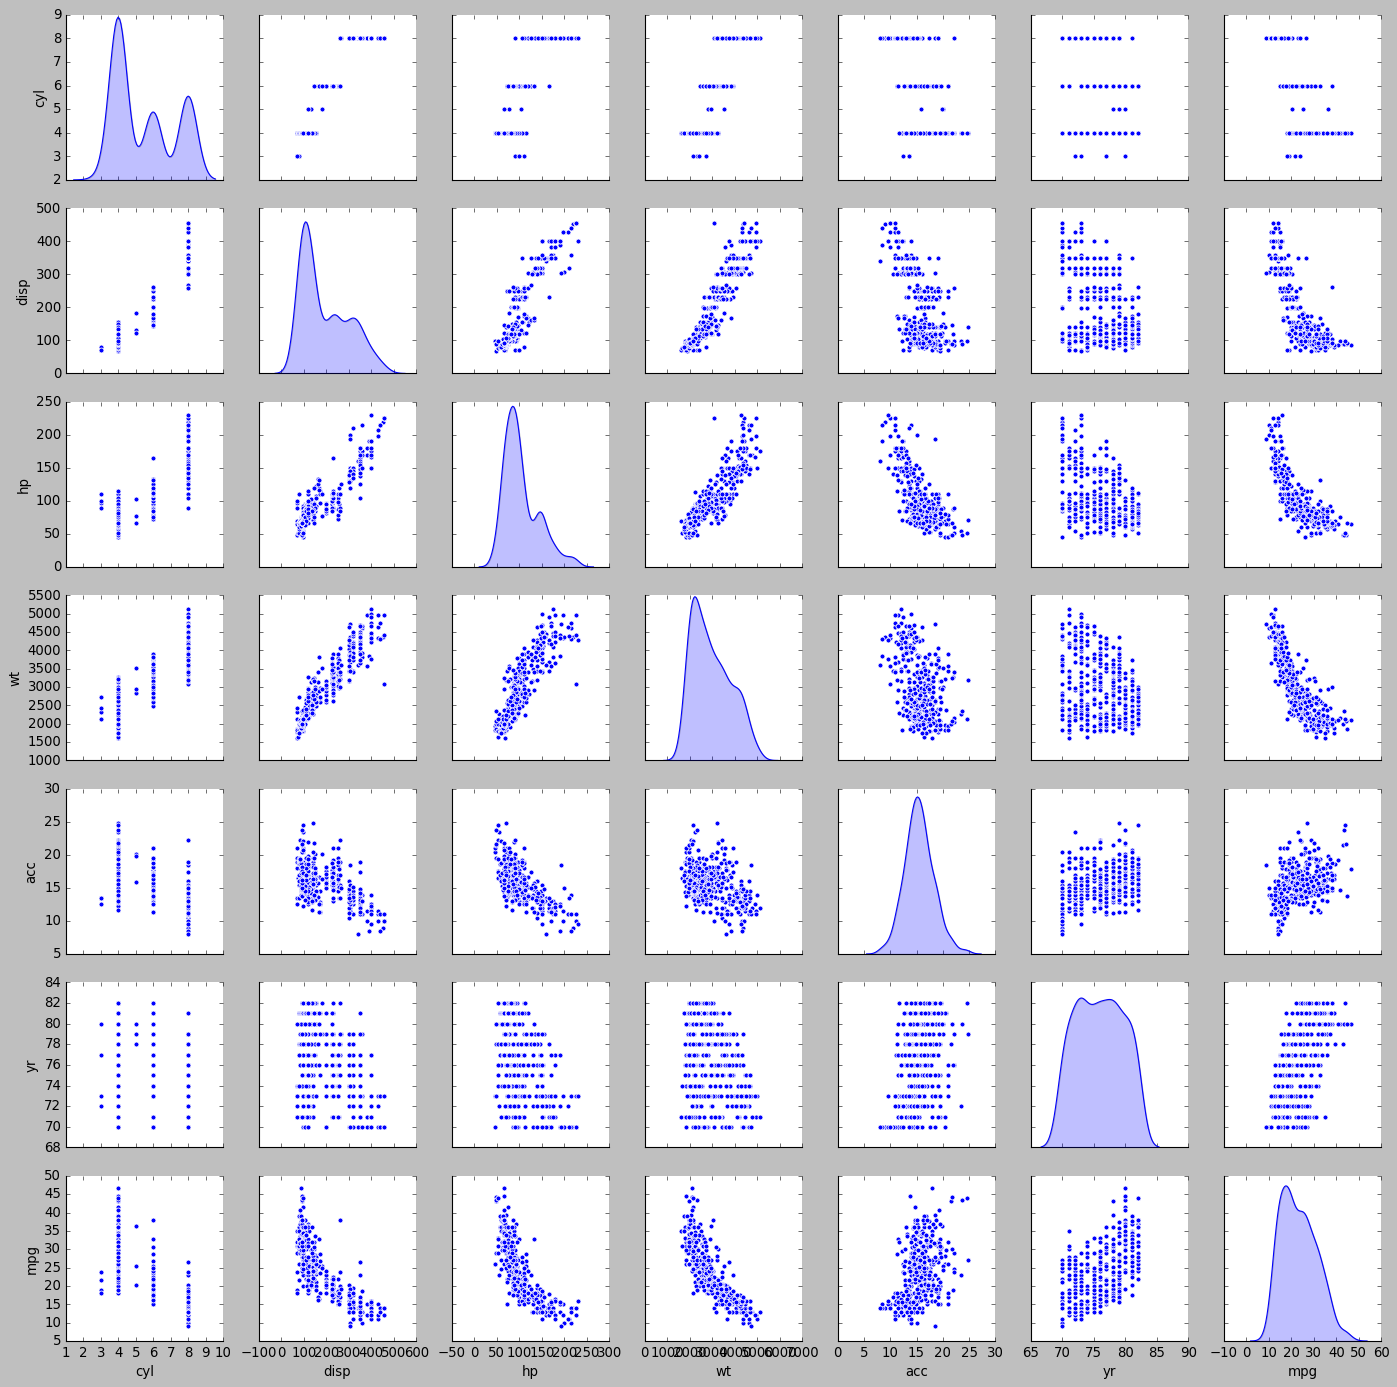

In [56]:
sns.pairplot(df_drop_na, diag_kind='kde') 


> Since cyl has 3 modes, disp 3 modes and hp has 2 modes, teh number of clusters would be around 3 (incase the clusters overlap) to 3 * 3 = 9 clusters (incase the clusters are hidden)

Standardizing of the data using Z-score

In [85]:
from scipy.stats import zscore
df_numc = df_drop_na.drop(['car name'],axis=1)
df_zscore = df_numc.apply(zscore)
df_zscore.sample(5)

,cyl,disp,hp,wt,acc,yr,mpg
10,1.483947,1.804490,1.704660,0.690090,-2.011120,-1.625315,-1.083498
386,0.309967,-0.128332,0.143869,-0.038410,0.311639,1.636410,0.199368
316,0.309967,0.292679,-0.376395,0.475548,1.146381,1.092789,-0.557523
194,0.309967,0.359658,-0.376395,0.126622,0.747157,0.005547,-0.121349
245,-0.864014,-0.922511,-1.000712,-1.388139,-0.414223,0.549168,1.623349


In [86]:
df_zscore.shape

(392, 7)

In [59]:
df_zscore[(df_zscore < -3) | (df_zscore > 3)].any()

cyl     False
disp    False
hp       True
wt      False
acc      True
yr      False
mpg     False
dtype: bool

In [60]:
df_zscore = df_zscore[(df_zscore > -3) & (df_zscore < 3)].dropna() # dropping the outliers from the dataset.

Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

Calculating distortion - C distance

In [87]:
#Ploting elbow curve :
    
distortion = []
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
cluster_range=range(2,10)               
cluster_sil_scores = []

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [62]:
for k in cluster_range:
    clusters=KMeans(n_clusters=k , random_state=1)
    clusters.fit(df_zscore)
    prediction=clusters.predict(df_zscore)
    distortion.append( clusters.inertia_ )
    labels = clusters.labels_                     
    centroids = clusters.cluster_centers_         
    cluster_sil_scores.append(metrics.silhouette_score(df_zscore, labels, metric='euclidean'))

In [63]:
df_cluster = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )
df_cluster

,num_clusters,distortion,Avg Sil Score
0,2,1204.824514,0.454906
1,3,873.749839,0.357003
2,4,673.618829,0.354160
3,5,606.153798,0.316932
4,6,546.704768,0.278717
5,7,496.835191,0.279842
6,8,452.962095,0.267495
7,9,415.768744,0.268032


Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

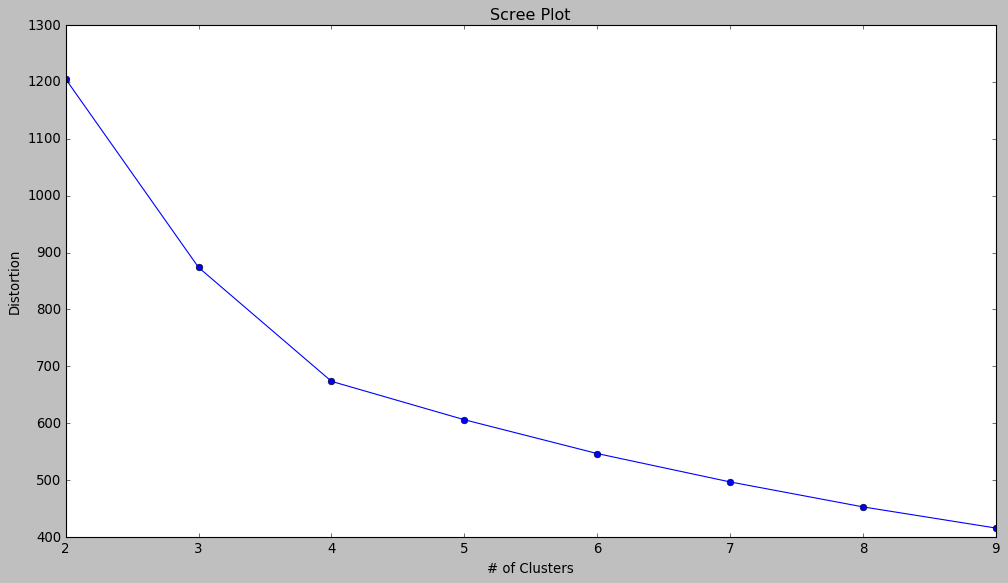

In [88]:
plt.figure(figsize=(15,8))
plt.title('Scree Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.plot( df_cluster.num_clusters, df_cluster.distortion, marker = "o" )

Find the optimal value of K

Choosing value of K as 4, since we can see a higher rate of drop using the Scree plot

In [65]:
clusters=KMeans(n_clusters=4 , random_state=1)
clusters.fit(df_zscore)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [66]:
clusters.cluster_centers_

array([[ 0.40230226,  0.28751848, -0.04845337,  0.32576022,  0.3055226 ,
         0.0391417 , -0.48862314],
       [-0.83140299, -0.79200793, -0.74949159, -0.79099938,  0.32508132,
         1.10537262,  1.19442058],
       [ 1.48394702,  1.43589274,  1.40839908,  1.38317324, -1.01144655,
        -0.63169726, -1.14821171],
       [-0.87000325, -0.8139871 , -0.56061084, -0.76140124,  0.32978598,
        -0.63237525,  0.21193472]])

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [67]:
pd.DataFrame(clusters.cluster_centers_, columns=df_numc.columns).T

,0,1,2,3
cyl,0.402302,-0.831403,1.483947,-0.870003
disp,0.287518,-0.792008,1.435893,-0.813987
hp,-0.048453,-0.749492,1.408399,-0.560611
wt,0.325760,-0.790999,1.383173,-0.761401
acc,0.305523,0.325081,-1.011447,0.329786
yr,0.039142,1.105373,-0.631697,-0.632375
mpg,-0.488623,1.194421,-1.148212,0.211935


In [68]:
df_zscore['cluster'] = clusters.labels_
df_zscore.sample(5)

,cyl,disp,hp,wt,acc,yr,mpg,cluster
142,-0.864014,-1.104311,-0.974698,-1.195994,-0.014999,-0.538074,0.327654,3
127,0.309967,0.359658,-0.116263,-0.090278,0.166467,-0.538074,-0.570352,0
243,-1.451004,-1.094742,0.143869,-0.303641,-0.740861,0.277358,-0.249635,3
77,-0.864014,-0.702437,-0.740580,-0.550011,0.892329,-1.081695,-0.185492,3
193,0.309967,0.053468,-0.610514,0.040569,0.747157,0.005547,0.071081,0


In [69]:
df_zscore['cluster'].value_counts()

1    108
3     98
2     90
0     89
Name: cluster, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014DAABE0>,
      dtype=object)

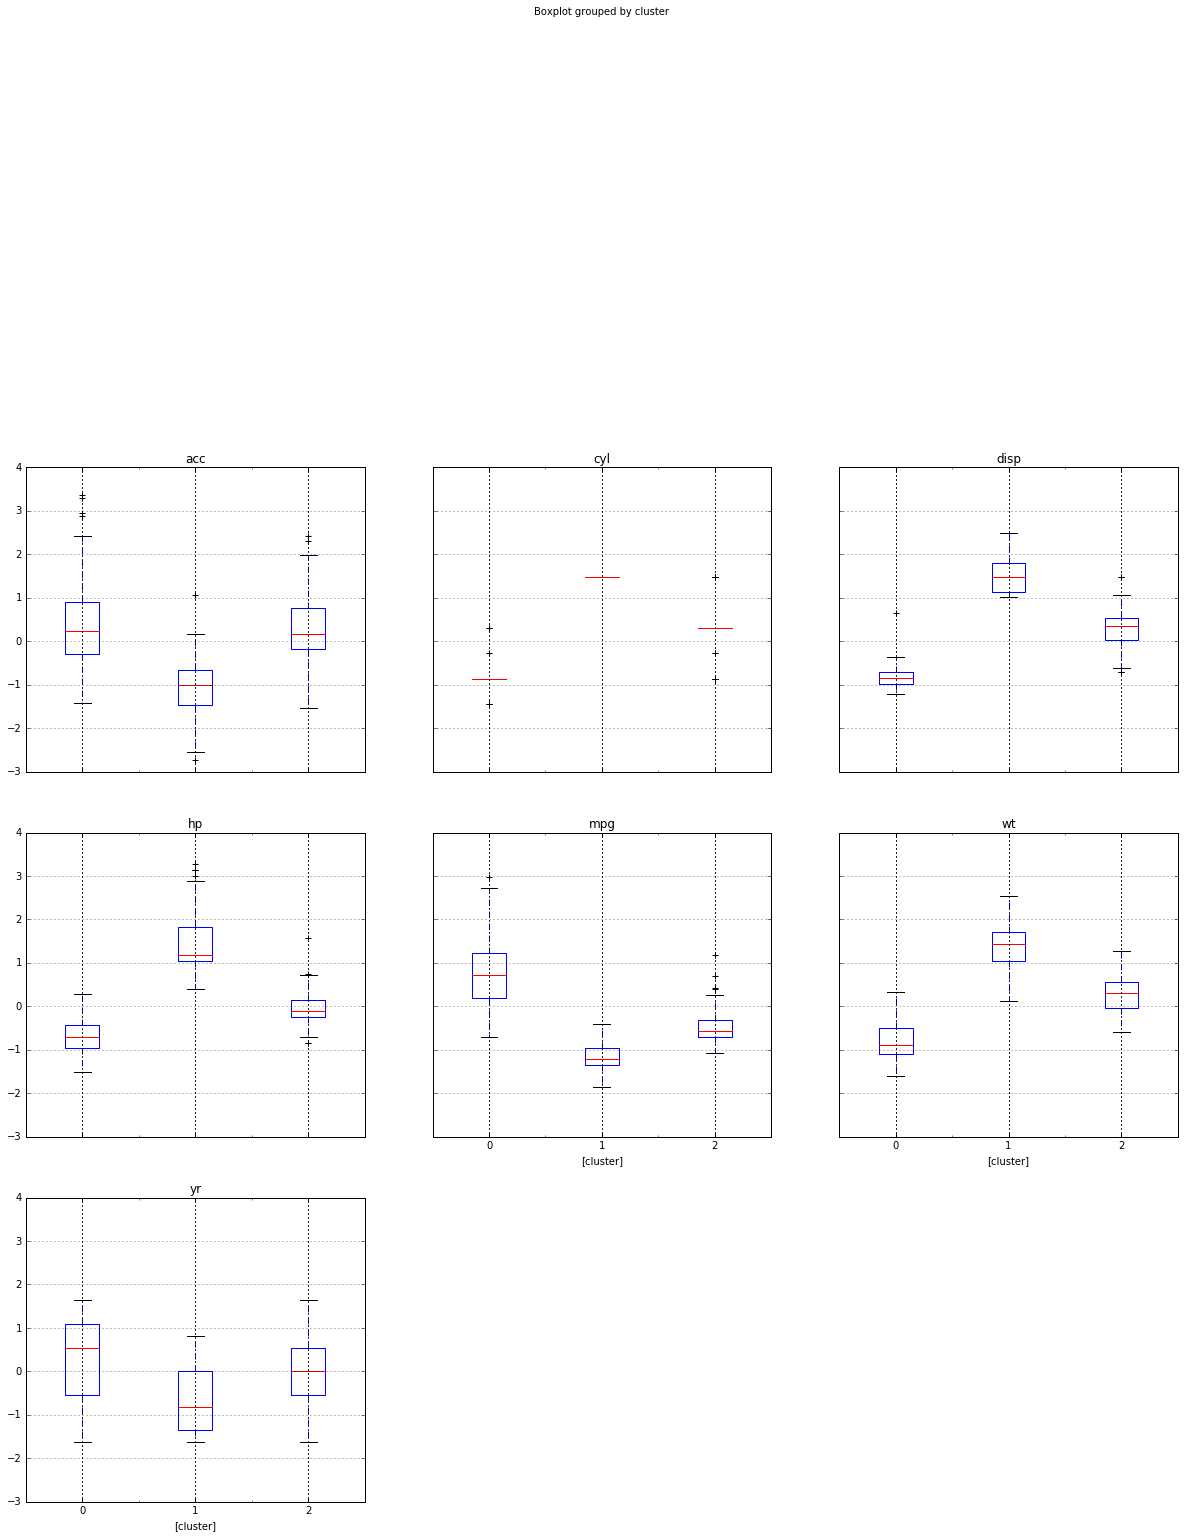

In [29]:
df_zscore.boxplot(by = 'cluster',  layout=(12,3), figsize=(20, 80))

In [ ]:
Observations
•Cluster 1 has the highest mpg cars and relatively lower weight, low hp, cyl and disp
•Cluster 2 has the lowest mpg cars, and highest wt, hp, cyl and disp 
•Cluster 0,3 are lying between clusters 1 and 2, following similar trends as 1 and 2 where 3 is having higher mpg than 0 and has lower weight, hp, cyl and disp than 0


Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [72]:
# Adding cluster to our original cleaned df
df_drop_na_with_cluster = df_drop_na.join(df_zscore['cluster'], on=df_drop_na.index).dropna()
df_drop_na_with_cluster.shape

(385, 9)

In [73]:
df_drop_na_with_cluster.sample(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg,cluster
295,dodge colt hatchback custom,4,98.0,80.0,1915,14.4,79,35.7,1.0
169,amc gremlin,6,232.0,100.0,2914,16.0,75,20.0,0.0
92,ford ltd,8,351.0,158.0,4363,13.0,73,13.0,2.0
11,plymouth 'cuda 340,8,340.0,160.0,3609,8.0,70,14.0,2.0
68,buick lesabre custom,8,350.0,155.0,4502,13.5,72,13.0,2.0


In [74]:
df_drop_na_with_cluster['cluster'].value_counts()

1.0    108
3.0     98
2.0     90
0.0     89
Name: cluster, dtype: int64

In [75]:
cluster_list = df_drop_na_with_cluster.cluster.unique()
cluster_list

array([2., 3., 0., 1.])

In [76]:
from sklearn.linear_model import LinearRegression

In [83]:
for i in cluster_list:
    print("\n\n\nFor cluster: ",i)
    cluster_df = df_drop_na_with_cluster[df_drop_na_with_cluster['cluster'] == i]

    X = cluster_df.drop(['car name','mpg','cluster'], axis=1) #independent variables
    y = cluster_df[['mpg']]    #Dependent Variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=100)
    regression_model = LinearRegression() 
    regression_model.fit(X_train, y_train)
    print("Respective coefs")
    print(pd.DataFrame(regression_model.coef_[0],X_train.columns))
    print("\nModel Intercepts: ", regression_model.intercept_[0])
    print("\nModel Score: ", regression_model.score(X_test, y_test))




For cluster:  2.0
Respective coefs
             0
cyl   0.000000
disp -0.013780
hp   -0.035556
wt   -0.000429
acc  -0.568489
yr    0.381273

Model Intercepts:  5.813512331419231

Model Score:  0.38208717204161735



For cluster:  3.0
Respective coefs
             0
cyl   2.293283
disp -0.034019
hp   -0.011596
wt   -0.006723
acc   0.142831
yr    0.159862

Model Intercepts:  22.598116111183167

Model Score:  -0.0382088666468543



For cluster:  0.0
Respective coefs
             0
cyl   0.725085
disp  0.006706
hp   -0.024009
wt   -0.003516
acc  -0.195381
yr    0.463388

Model Intercepts:  -4.436478221709148

Model Score:  0.5599618648262306



For cluster:  1.0
Respective coefs
             0
cyl   4.532405
disp -0.021422
hp   -0.093417
wt   -0.005947
acc   0.135406
yr    0.631084

Model Intercepts:  -15.44085626192851

Model Score:  0.5023946654042936


In [84]:
print("\n\nWithout using clustering we are getting better model score\n")
X = df_drop_na_with_cluster.drop(['car name','mpg','cluster'], axis=1) #independent variables
y = df_drop_na_with_cluster[['mpg']]    #Dependent Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=25)
regression_model = LinearRegression() 
regression_model.fit(X_train, y_train)
print("Respective coefs")

print(pd.DataFrame(regression_model.coef_[0],X_train.columns))
print("\nModel Intercepts: ", regression_model.intercept_[0])
print("\nModel Score: ", regression_model.score(X_test, y_test))



Without using clustering we are getting better model score

Respective coefs
             0
cyl  -0.174741
disp  0.013414
hp   -0.010977
wt   -0.007196
acc   0.189225
yr    0.743213

Model Intercepts:  -14.95168009999746

Model Score:  0.7716555328850088
